# Lab 0: Hello Quantum World!

# Table of Contents

* [Welcome to the Qiskit Global Summer School 2025!](#welcome)
    - [Lab 0 overview](#overview)
    - [Install Qiskit](#install)
    - [Troubleshooting](#troubleshooting)
    - [Setting API token](#setting-ibm-cloud)
    - [Imports](#imports)
    - [Sanity check](#sanity-check)
* [Generate a three-qubit GHZ state using Qiskit patterns](#ghz) 
    - [Step 1. Map](#map)
    - [Step 2. Optimize](#optimize)
    - [Step 3. Execute](#execute)
    - [Step 4. Post-process](#post-process)
* [Congratulations!](#congratulations)
    - [Bonus challenge: Running GHZ on hardware](#bonus)


# Welcome to the Qiskit Global Summer School 2025! <a id="welcome"></a>

We are thrilled to welcome you to another year of the Qiskit Global Summer School. This two-week summer program combines theoretical lectures with hands-on exercises to expand the knowledge of quantum computing and quantum programming among the community of students, researchers and professionals that use Qiskit in their everyday quantum journey. 

The hands-on component of this summer school consists of a series of Jupyter notebooks ("labs") designed to guide you through different topics of interest.

Each lab complements the corresponding theoretical lectures and includes helpful links to documentation, tutorials and even references to the lectures. Furthermore, you can also find many useful resources on IBM's new page of quantum education [IBM Quantum Learning](https://learning.quantum.ibm.com/).

## Lab 0 overview <a id="overview"></a>

The main goal of this introductory lab is to show you how to use the challenge notebooks, how to grade your solutions and making sure that your computer is correctly set up for executing the quantum codes that you will be asked to complete.

To complete the different labs of the QGSS you need to know that every notebook will contain some predefined cells that you don't need to modify and some challenge code blocks that you will need to fill with your own code. In particular, you will need to write the required code below each line that has the `### WRITE YOUR CODE BELOW HERE ###` comment. For the correct execution and grading of the challenges, make sure that every time you restart the kernel you execute every cell in order. This will guarantee that all the code is updated and everything runs smoothly. There may be a few exceptions, such as installation cells or cells where you save your account credentials. These will likely only need to be run once.

The content of this lab focuses on using Qiskit patterns to produce a GHZ state, emphasizing the importance of designing optimized quantum circuits. Then, it will be a bonus exercise where you can execute your code on a real quantum computer!

## Install Qiskit <a id="install"></a>
Quantum computers stand as a promising technology that promises to disrupt how some calculations are done. From breaking encryptation with Shor's algorithm, to enable faster searches with Grover's to even design better batteries with quantum phase estimation. However, when we think about these nice applications, we have to think as well about how to design and execute these algorithms. For many of us this tool is Qiskit! A software for design and implementation of quantum circuits in simulators and real hardware.

In particular, throughout this Quantum Summer School 2025 you will need Qiskit 2.0 and this notebook is going to provide you with the detailed instructions to get your machine ready to go!

First you must check that the version of python you are using in your environment is python>=3.9.6, to make sure that it will be compatible with the latest Qiskit version we will use

In [1]:
from platform import python_version

print(python_version())

3.13.4


If that is not your case, you can upgrade it using your preferred tool. If you are unsure about how to do it, some recommended options are:

- MacOS: [Homebrew](https://brew.sh/)
- Windows: [Chocolatey](https://chocolatey.org/install)
- Linux: `sudo apt-get update `


A detailed guide on how to do it depending on your OS is detailed here: [How to update python](https://4geeks.com/how-to/how-to-update-python-version)

Now let's install the grader which will install Qiskit 2.x and the necessary libraries we will need for the summer school.

In [2]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to g:\temp\pip-install-w30p7ffq\qc-grader_69c6c4bc6ea847b39d61e78255c5920f
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit add51a455bbb2769ec75d05a9d02a4528ffc5420
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git 'G:\Temp\pip-install-w30p7ffq\qc-grader_69c6c4bc6ea847b39d61e78255c5920f'


In [3]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.0.3
Grader version: 0.22.9


You should have Qiskit version `>=2.0.0` and Grader `>=0.22.0`. If you see a lower version, you need to restart your kernel and reinstall the grader again.

## Troubleshooting <a id="troubleshooting"></a>

If the previous cell raised any error, you can opt to install Qiskit in a virtual environment. Otherwise, you can ignore this cell and proceed to the next one.

Here we propose two different methods to set up a virtual environment to install Qiskit.
1. Using [venv](https://docs.python.org/3/library/venv.html), as explained in the [Qiskit installation guide](https://docs.quantum.ibm.com/guides/install-qiskit). 
2. Using [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html), as explained in this video of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4).

Both methods are respectively detailed in the Qiskit links provided.

## Setting IBM Cloud account <a id="setting-ibm-cloud"></a>

This point is very important since it will be an essential step for tracking your progress with the grader. Also, it will allow you to execute quantum circuits on real hardware.


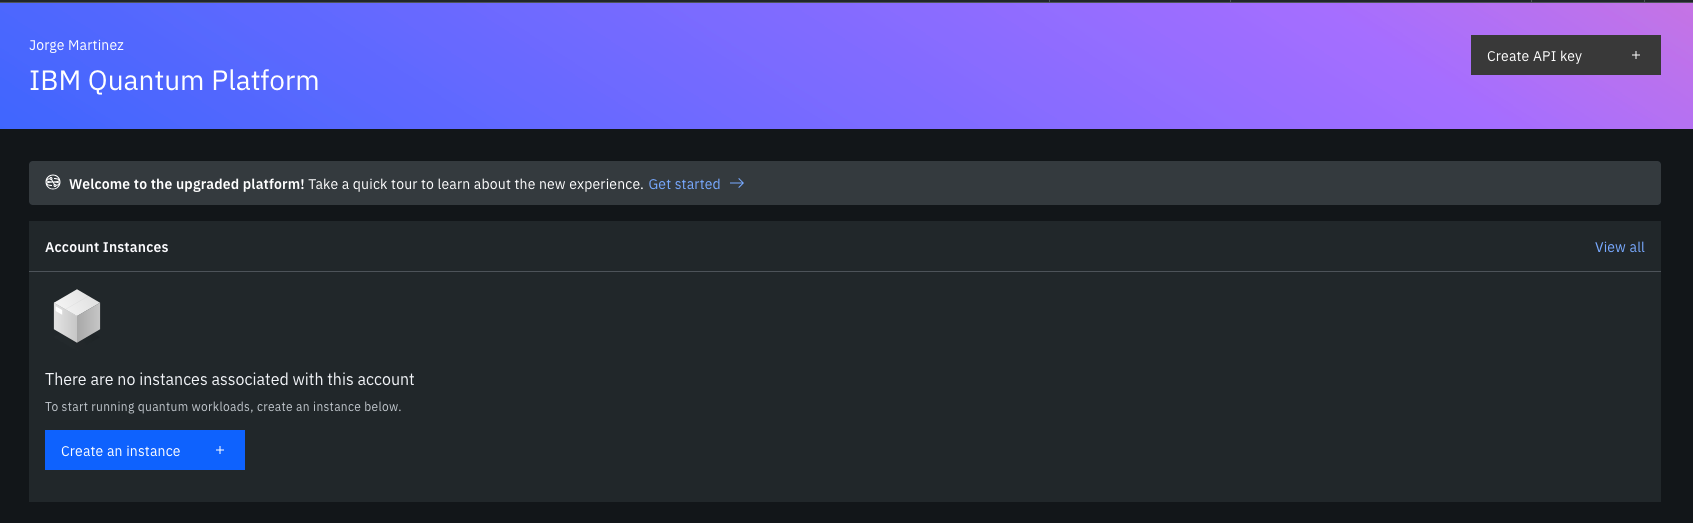

To do so, you need to follow the following steps:

1. Go to the [upgraded IBM Quantum Platform](https://quantum.cloud.ibm.com/).
2. Check that you log in using the same email you registered for this event with.
3. Go to the top right corner of the above picture and create your API token and copy it.
4. In the cell below, replace `deleteThisAndPasteYourAPIKeyHere` with your API key.
5. Go to the bottom left corner of the above picture and **create your instance**.
6. After the instance is created, copy its associated CRN code.
7. In the cell below, replace `deleteThisAndPasteYourCRNHere` with your CRN code.

See [this guide](https://quantum.cloud.ibm.com/docs/en/guides/cloud-setup) for more details on how to set up your IBM Cloud account.


In [ ]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = ""
your_crn = ""

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    name="qgss-2025",
    channel="ibm_cloud",#ibm_quantum_platform
    token=your_api_key,
    instance=your_crn,
    set_as_default=True,
    overwrite=True,
)

In [ ]:
# Check that the account has been saved properly
service = QiskitRuntimeService()
service.saved_accounts()
# its the only one that i dont run because display your account

## Imports <a id="imports"></a>


In [6]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator
)

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

## Sanity check <a id="sanity-check"></a>

Let's now create a very simple quantum circuit to check that everything is working as expected and we are not incurring into any unexpected error.

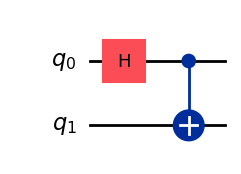

In [7]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

The drawing you are seeing represents a quantum circuit that produces a Bell state:

$$|Bell\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

# Generate a three-qubit GHZ state using Qiskit patterns <a id="ghz"></a>

Now, we will follow this episode of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4) to guide you through the process of generating a three-qubit GHZ state using [Qiskit patterns](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns). 

A Qiskit pattern is a general framework for breaking down domain-specific problems and contextualizing required capabilities in stages. This allows for the seamless composability of new capabilities developed by IBM Quantum® researchers (and others) and enables a future in which quantum computing tasks are performed by powerful heterogenous (CPU/GPU/QPU) computing infrastructure. 

The four steps of a Qiskit pattern are as follows:

1. **Map** problem to quantum circuits and operators
2. **Optimize** for target hardware
3. **Execute** on target hardware
4. **Post-process** results


## Step 1. Map <a id="map"></a>

The Greenberger–Horne–Zeilinger (GHZ) state is the extension to three (or more) qubits to the maximally entangled state characteristic of the Bell state depicted above. That means that the GHZ state is:

$$
|GHZ\rangle = \frac{|000\rangle+|111\rangle}{\sqrt{2}}.
$$

One of the interesting things of the GHZ state is that there are different and equivalent ways to build it using a quantum circuit. In Exercise 1 you are asked to do it in one of the most common ones.

<a id="Exercise_1"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 1: Design a GHZ state</b> 

We are starting with the first exercise of the summer school! Exciting, huh?

In this exercise you are asked to design a GHZ state following the steps below:

1. Applying a Hadamard gate to qubit 0, putting it into a superposition. 
2. Apply a CNOT gate between qubits 0 and 1.
3. Apply a CNOT gate between qubits 1 and 2.

</div>

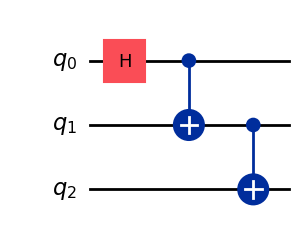

In [ ]:
# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubits 0 and 1
qc.cx(0,1)
# Add a CNOT gate to qubits 1 and 2
qc.cx(1,2)
### YOUR CODE FINISHES HERE    ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

In [12]:
# Submit your answer using following code
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 2. Optimize <a id="optimize"></a>

Well done designing the circuit!

In this case, the circuit is very shallow, and it is not possible to further simplify it or reduce the required number of gates that are needed to build the GHZ state. However, there are other scenarios in which optimizing the circuit is key.

There may be situations where you face restrictions in how your quantum circuit can be designed. For example, when running circuits on quantum hardware, you might find connectivity constraints between qubits. This means that some qubits may not be physically connected, so you will need to think of a smart way to implement gates that produce the desired quantum state. Luckily for us, this is where Qiskit transpiler comes to the rescue! You can provide the desired circuit along with the device's constraints to the transpiler and it will handle the optimization for you.

Let us consider, for the GHZ state, a situation in which we are limited to interactions only between qubits 0 and 1 and qubits 0 and 2, but not between qubits 1 and 2. We can introduce these constraints to the transpiler using the `transpile` function and take a look to the resultant circuit.

<a id="Exercise_2"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 2: Transpile a GHZ state</b> 

In this second exercise you are asked to transpile the previous GHZ state with the mentioned connectivity constraints:

- Qubit 0 <---> Qubit 1
- Qubit 0 <---> Qubit 2
- ~~Qubit 1 <---> Qubit 2~~

</div>

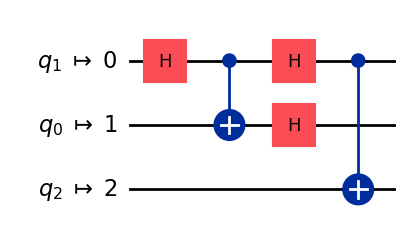

In [ ]:
### WRITE YOUR CODE BELOW HERE ###
# Write the coupling map of connections between qubits 0 and 1 and 0 and 2
from qiskit.transpiler import CouplingMap
coupling_map = CouplingMap([(0,1),(0,2)])

# Transpile the quantum circuit `qc` using the `transpile` function and the coupling map

# Coupling map is used as a graph construction where you can specify the edges on the graph
# on this exercise you need edges for qubit 0 to 1 and qubit 0 to 2

qc_transpiled =transpile(qc,coupling_map=coupling_map,optimization_level=3)
### YOUR CODE FINISHES HERE    ###

### Observation now you can construct your circuit compiler (transpiler) based on user especification and choose 
#   bethween three categories "basis_gates","coupling_map" and "dt"

qc_transpiled.draw("mpl")

In [16]:
# Submit your answer using following code
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 3. Execute <a id="execute"></a>

The next step is exciting, we are going to run the quantum circuit using Qiskit Runtime! 

We will do that using the two [Qiskit Primitives](https://quantum.cloud.ibm.com/docs/en/guides/primitives):
1. Sampler: it samples the output register from the execution of one or more quantum circuits. Its output is counts on per-shot measurements. 
2. Estimator: it computes the expectation value of one or more observables with respect to the states generated by the quantum circuit. Its output consist of the expectation values along with their standard errors.

First, we execute our circuit using the Sampler, then save the results as the variable `results_sampler`. 

In [17]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

Now, we run our circuit using the Estimator primitive, then save the results as the variable `results_estimator` 

In [18]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

You may now go to the final step of Qiskit patterns, where we will visualize what we have obtained.

## Step 4. Post-process <a id="post-process"></a>

Finally, the last step of Qiskit patterns is to postprocess the information we have gathered from the execution of the quantum circuit.

First we visualize the results from the sampler where we can visualize the counts with a histogram plot and check in one glance how the two possible quantum states are measured with a probability of 50%

  Outcomes : {'000': 510, '111': 514}


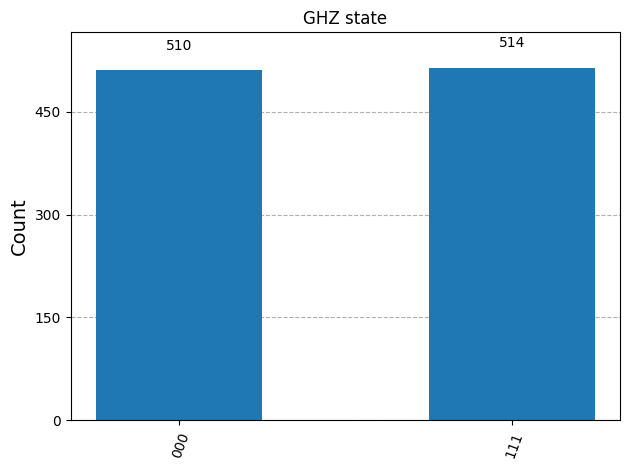

In [19]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

And now we can visualize the results of the estimator

Expectation values: [('ZZZ', np.float64(-0.02099609375)), ('ZZX', np.float64(0.021484375)), ('ZII', np.float64(0.01220703125)), ('XXI', np.float64(-0.00634765625)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


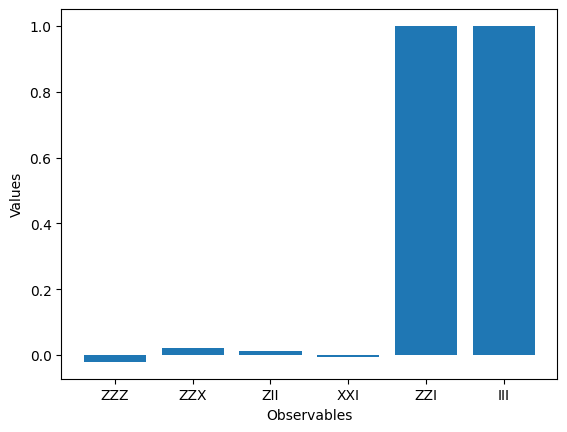

In [20]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

One can see that the observables $ZZI$ and $III$ have an expectation value of 1, since $ZZI$ introduces two minus signs that cancel out and $III$ acts as the identity, leaving the GHZ state unchanged. On the other hand, the rest of the observables have an expectation value of 0, since their $Z$ operators introduce an odd number of minus signs or the $X$ operators flip a number of qubits that make the states overlapping orthogonal.

# Congratulations! <a id="congratulations"></a>

You have successfully completed Lab 0 and are now all set to start with the Quantum Global Summer School 2025!

In this lab you have successfully set up your machine to execute Qiskit 2.x and saved your IBM Cloud token to track your progress during the summer school and execute quantum circuits in real hardware. Moreover, you have learnt about Qiskit patterns, implementing a specific example of the GHZ circuit and highlighting the importance of designing an optimized quantum circuit. Finally, you have executed a quantum circuit of the GHZ on a quantum simulator observing how the measurements of the Sampler are in good agreement with the theoretical probabilities of measuring the states $|000\rangle$ and $|111\rangle$ with 50% of probability.

At this point, as a bonus exercise it would be interesting to perform the same experiment on real hardware to see how the noise affect the outcomes and check that in that case we will not have a perfect agreement between the theoretical probabilities and the outcomes. 

Are you ready? Let's dig in!

## Bonus challenge: Running GHZ on hardware <a id="bonus"></a>

To execute a quantum circuit on a quantum computer using Qiskit we first need to define the quantum backend. We could manually select which quantum computer we want to use out of the ones available by IBM Cloud. However, sometimes it is more convenient just to select the machine that is least busy at the moment to ensure a fast execution. That's where the method `least_busy` comes in handy.

In [21]:
# Define the service. This allows you to access IBM QPUs.
service = QiskitRuntimeService()

# Get a backend
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")

We are using the ibm_torino quantum computer


With the next cell we will illustrate how easy it is to execute quantum circuits on hardware with `QiskitRuntimeService`. Once we have selected the backend in the cell above, we can just copy and paste the same lines of code that we wrote for the Sampler simulator, including postprocessing and visualization.

Outcomes : {'000': 510, '111': 514}


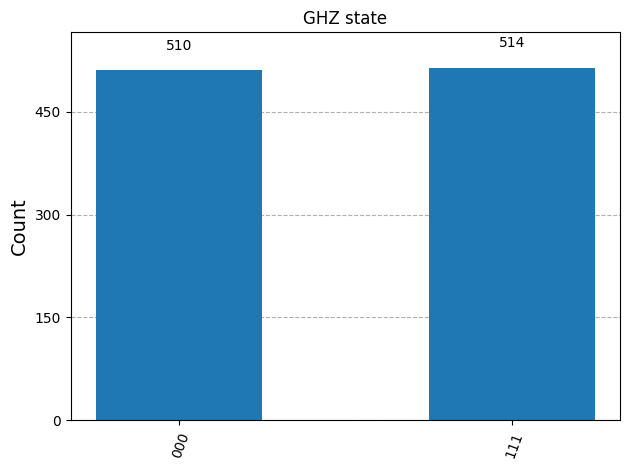

In [ ]:
### WRITE YOUR CODE BELOW HERE ###
# Step 1. Map
# You should have created a GHZ circuit above and assigned with variable `qc`

# Step 2. Optimize
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
qc_transpiled = transpile(qc,coupling_map=coupling_map,optimization_level=3)

# Step 3. Execute
sampler = Sampler(mode=backend)
job = sampler.run(pm.run([qc_transpiled]))

# Step 4. Post-process
results = job.result()
counts_list = results_sampler[0].data.meas.get_counts()

### YOUR CODE FINISHES HERE    ###

print(f"Outcomes : {counts_list}")
plot_histogram(counts_list,title='GHZ state')

Awesome! 

You have managed to run a circuit on a real quantum computer, and the results are quite good! The most repeated states are $|000\rangle$ and $|111\rangle$ and they accumulate a probability just below 50%. However, in this case we can observe that the noise of the quantum machines is producing that some quantum states are measured, even if the theoretical probability of measuring is 0. This is indeed expected, and we will see in the next labs how we can try to correct or mitigate the errors that are introduced by the noisy nature of quantum computers.

# Additional information

**Created by:** Jorge Martínez de Lejarza

**Advised by:** Marcel Pfaffhauser, Junye Huang

**Version:** 0.1.0